# MODELO DE CLASIFICACIÓN DE REGRESIÓN LOGÍSTICA

Presentamos e importamos todas las librerías que vamos a necesitar a lo largo del modelo.

In [60]:
import pandas as pd
import numpy as np

# Metric Libraries
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Visualization Libraries
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from collections import Counter
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss 



Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y nombre de las Columnas / variables que la componen. Las variables que se refieren a unidades de negocio no van a ser utilizadas en el modelo por lo que las transformamos a Objeto para una mejor comprensión y segmentación de las propias variables.

In [61]:
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [62]:
# Transformamos las variables de la unidad de negocio en objeto ya que no queremos utilizarlas.
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [63]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287,TUTELA,28332,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475,ASESORAMIENTO FINANCIERO,14204,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000,ASESORAMIENTO FINANCIERO,14219,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [64]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## Primera aproximación

In [65]:
df = df.select_dtypes('number')

In [66]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [67]:
# Instanciamos el clasificador
clf_log_regressor_first_aproach = LogisticRegression()

In [68]:
# Entrenamos el modelo
clf_log_regressor_first_aproach.fit(X,y)

LogisticRegression()

In [69]:
# Sacamos las predicciones
clf_log_regressor_first_aproach.predict(X)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
# Dividimos el DF en set de train y de Test.  Damos 80% al train y 20% a test
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [71]:
# Entrenamos el modelo dividido.
clf_log_regressor_first_aproach.fit(X_train,y_train)

LogisticRegression()

In [72]:
# Primeras predicciones
clf_log_regressor_first_aproach.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
# Probabilidades de tener seguro
clf_log_regressor_first_aproach.predict_proba(X_test)[:, 1]

array([0.31004564, 0.13072842, 0.17100719, ..., 0.07256822, 0.13290052,
       0.03860107])

In [75]:
# Resultados Obtenidos de la primera aproximación

accuracy_score_first_aproach = accuracy_score(y_test,clf_log_regressor_first_aproach.predict(X_test))
precision_first_aproach  = precision_score(y_test,clf_log_regressor_first_aproach.predict(X_test))
recall_first_aproach = recall_score(y_test,clf_log_regressor_first_aproach.predict(X_test))
f1_score_first_aproach = f1_score(y_test,clf_log_regressor_first_aproach.predict(X_test))
roc_auc_score_first_aproach = roc_auc_score(y_test,clf_log_regressor_first_aproach.predict_proba(X_test)[:, 1])

print('== Primera Aproximación CLR_model ==')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_first_aproach)
print('------------------------------------')
print('precision  =',precision_first_aproach)
print('------------------------------------')
print('recall =', recall_first_aproach)
print('------------------------------------')
print('f1_score =', f1_score_first_aproach)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_first_aproach)

== Primera Aproximación CLR_model ==
------------------------------------
accuracy_score = 0.8687565771254501
------------------------------------
precision  = 0.4470588235294118
------------------------------------
recall = 0.022571064913025032
------------------------------------
f1_score = 0.042972536348949916
------------------------------------
roc_auc_score = 0.4880382752670486


Sin Entrenar: ROC AUC=0.500
Logistic Regression: ROC AUC=0.488


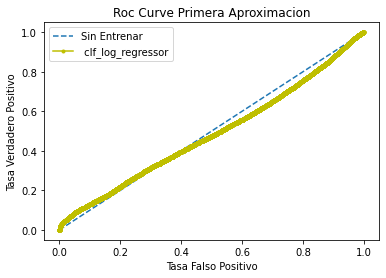

In [76]:
# Pintamos la curva ROC
# Generamos un clasificador sin entrenar que asignada 0 a todo
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clf_log_regressor_first_aproach.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# Calculamos la curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor_first_aproach.predict_proba(X_test)[:, 1])
# Pintamos la curva ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin Entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Etiquetas
pyplot.title('Roc Curve Primera Aproximacion')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/CLR Model - Roc Curve First Aproach.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Construccion del modelo

In [77]:
# Leemos el Data Frame
df_normalized = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalized.csv')

In [78]:
# Inputs & Target 
X = df_normalized.drop(['lp_seg_hogar'], axis = 1)
y= df_normalized['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6684992 (417812, 16)
Datos y = 417812 (417812,)



Hemos visto en EDA que Target está muy desequilibrado. Vamos a utilizar 3 fórmulas diferentes para arreglar este desequilibrio. Después de entrenar las tres opciones Weigth balanced & Smote dan los mejores resultados. NearMiss obtiene resultados muy bajos

- Penalización para compensar __Weigth balanced____
- NearMiss
- Smote

### 1ª estrategia: Penalización para compensar Weigth balanced

In [79]:
# Elegido Solver liblinear. 'newton-cg' no converge. 
clf_log_regressor_wb = LogisticRegression(solver = 'liblinear', class_weight='balanced')

In [80]:
# Ajustamos nuestro conjunto de entrenamiento y prueba. (80-20)
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [81]:
# Entrenamos
clf_log_regressor_wb.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [82]:
# Primeas Predicciones
clf_log_regressor_wb.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [83]:
# Probabilidades de tener Seguro de Hogar
clf_log_regressor_wb.predict_proba(X_test)[:, 1]

array([0.51437495, 0.14824863, 0.03242294, ..., 0.19294869, 0.82027084,
       0.03561958])

__Primeros resultados__. Los resultados obtenidos en el entrenamiento son muy parecidos a los obtenidos en el test. Nuestro modelo entrenado está generalizando bien y podemos considerarlo como bueno por ahora, pero todavía tenemos que conseguir mejores métricas. No hay sobreajuste.  Confirmamos que generaliza bien con la Validación Cruzada tomando las medias de las diferentes métricas.

In [84]:
# Posibilidad de Overfitting. Primeros resultados con la métrica elegida "Recall" para ver si nuestro modelo generaliza bien.
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clf_log_regressor_wb.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clf_log_regressor_wb.predict(X_test)))


===========RECALL TRAIN============
recall = 0.8798620509014712
===========RECALL TEST=============
recall = 0.8873825979089137


## Técnicas de validación cruzada.  Métricas: Validación cruzada
Utilizamos la validación cruzada para iterar 5 veces a lo largo del conjunto de entrenamiento.

- Apartamos 1/5 muestras.
- Entrenamos el modelo con las 4/5 muestras restantes.
- Mediremos con diferentes métricas el resultado obtenido en las muestras apartadas.
- Esto significa que hacemos 5 entrenamientos independientes.
- El resultado será la media de las 5 métricas anteriores.


In [85]:
cross_val_score_precision = cross_val_score(clf_log_regressor_wb,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clf_log_regressor_wb,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clf_log_regressor_wb,X,y,cv=5,scoring="f1").mean()
print('Cross Validation: ', cross_val_score_precision , cross_val_score_recall, cross_val_score_f1)

Cross Validation:  0.2834200427611363 0.8799299474605954 0.42870319618643915


### Confussion Matrix

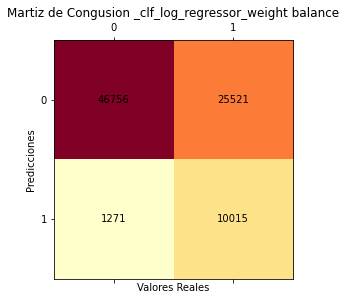

In [86]:
# Ploteamos la Matriz de Confusion
confusion_matrix_clf_log_regressor_wb = confusion_matrix(y_test,clf_log_regressor_wb.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(confusion_matrix_clf_log_regressor_wb, cmap=plt.cm.YlOrRd)
for i in range(confusion_matrix_clf_log_regressor_wb.shape[0]):
    for j in range(confusion_matrix_clf_log_regressor_wb.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_clf_log_regressor_wb[i, j], va='center', ha='center')

plt.title('Martiz de Congusion _clf_log_regressor_weight balance')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/CLR Model - Confusion_matrix_clf_log_regressor_weight balance.png', dpi=75,bbox_inches='tight')
plt.show()


### Resultados CLR  Weigth balanced

In [87]:
accuracy_score_weigth_balance = accuracy_score(y_test,clf_log_regressor_wb.predict(X_test))
precision_weigth_balance  = precision_score(y_test,clf_log_regressor_wb.predict(X_test))
recall_weigth_balance = recall_score(y_test,clf_log_regressor_wb.predict(X_test))
f1_score_weigth_balance = f1_score(y_test,clf_log_regressor_wb.predict(X_test))
roc_auc_score_weigth_balance = roc_auc_score(y_test,clf_log_regressor_wb.predict_proba(X_test)[:, 1])

print('==== CLR_Weigth balanced RESULTADOS ====')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_weigth_balance)
print('------------------------------------')
print('precision  =',precision_weigth_balance)
print('------------------------------------')
print('recall =', recall_weigth_balance)
print('------------------------------------')
print('f1_score =', f1_score_weigth_balance)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_weigth_balance)

==== CLR_Weigth balanced RESULTADOS ====
------------------------------------
accuracy_score = 0.6793796297404353
------------------------------------
precision  = 0.28182687978388116
------------------------------------
recall = 0.8873825979089137
------------------------------------
f1_score = 0.427790354961343
------------------------------------
roc_auc_score = 0.8282334472601741


## Curva ROC balanceado con class weigth

Sin Entrenar: ROC AUC=0.500
Logistic Regression: ROC AUC=0.828


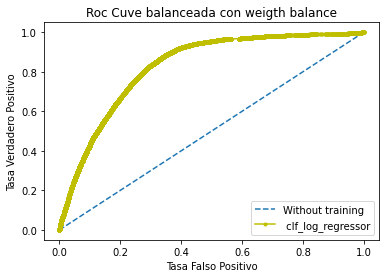

In [88]:
# Pintamos Curva Roc
# Generamos un clasificador sin entrenar que asignada 0 a todo
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clf_log_regressor_wb.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# Calculamos Curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor_wb.predict_proba(X_test)[:, 1])
# Ploteamos la Curva ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Etiquetas
pyplot.title('Roc Cuve balanceada con weigth balance')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/CLR Model - Roc Cuve Balanced with Weigth Balance.png', dpi=75,bbox_inches='tight')
pyplot.show()

### 2ª Estrategia de Balanceo __NearMiss__


In [89]:
# Instanciamos el clasificador
clf_log_regressor_nm = LogisticRegression(solver = 'liblinear')

In [90]:
# Entrenamos el modelo
clf_log_regressor_nm.fit(X,y)

LogisticRegression(solver='liblinear')

In [91]:
# Primeras Prediciones
clf_log_regressor_nm.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
# Balanceamos con NearMiss "
from imblearn.under_sampling import NearMiss
nr = NearMiss() 

In [93]:
# Ajustamos el set de entrenamiento
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)  

In [94]:
# Informacion de la distribucion antes y despues de Nearmiss

from collections import Counter
print ("Antes de NearMiss: {} ".format(Counter(y_train)))
print('====================================')
print ("Despues de NearMiss: : {} ".format(Counter(y_train_miss)))


Antes de NearMiss: Counter({0.0: 288435, 1.0: 45814}) 
Despues de NearMiss: : Counter({0.0: 45814, 1.0: 45814}) 


In [95]:
# Entrenamos
clf_log_regressor_nm.fit(X_train_miss, y_train_miss) 

LogisticRegression(solver='liblinear')

In [96]:
# Predicciones
clf_log_regressor_nm.predict(X_test)

array([1., 0., 0., ..., 1., 1., 0.])

In [97]:
# Probabilidades
clf_log_regressor_nm.predict_proba(X_test)[:, 1]

array([0.95399776, 0.08959986, 0.22343631, ..., 0.62982046, 0.94622198,
       0.27750429])

##  CLR Nearmiss Resultados

In [98]:
accuracy_score_nearmiss = accuracy_score(y_test,clf_log_regressor_nm.predict(X_test))
precision_nearmiss  = precision_score(y_test,clf_log_regressor_nm.predict(X_test))
recall_nearmiss = recall_score(y_test,clf_log_regressor_nm.predict(X_test))
f1_score_nearmiss = f1_score(y_test,clf_log_regressor_nm.predict(X_test))
roc_auc_score_nearmiss = roc_auc_score(y_test,clf_log_regressor_nm.predict_proba(X_test)[:, 1])

print('==== CLR Nearmiss RESULTADOSS ====')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_nearmiss)
print('------------------------------------')
print('precision  =',precision_nearmiss)
print('------------------------------------')
print('recall =', recall_nearmiss)
print('------------------------------------')
print('f1_score =', f1_score_nearmiss)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_nearmiss)

==== CLR Nearmiss RESULTADOSS ====
------------------------------------
accuracy_score = 0.6228115314194081
------------------------------------
precision  = 0.21620332706819648
------------------------------------
recall = 0.6828814460393408
------------------------------------
f1_score = 0.3284256280229263
------------------------------------
roc_auc_score = 0.7183664949438875


## Curva ROC balanceado con  Nearmiss

Sin Entrenar: ROC AUC=0.500
Logistic Regression: ROC AUC=0.718


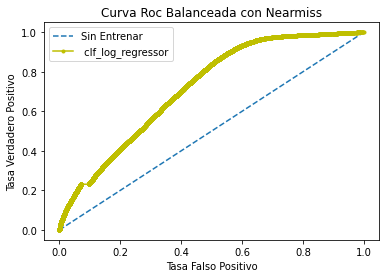

In [99]:
# Pintamos Curva Roc
# Generamos un clasificador sin entrenar que asignada 0 a todo
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clf_log_regressor_nm.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# Calculamos la Curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor_nm.predict_proba(X_test)[:, 1])
# Ploteamos
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin Entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Etiquetas
pyplot.title('Curva Roc Balanceada con Nearmiss')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/CLR Model - Roc Cuve Balanced with Nearmiss.png', dpi=75,bbox_inches='tight')
pyplot.show()

### 3ª Estrategia desbalanceo __Smote__

In [100]:
# Balanceo con Smote
sm = SMOTE(random_state = 2) 

In [101]:
clf_log_regressor_smote = LogisticRegression(solver = 'liblinear')

In [102]:
clf_log_regressor_smote.fit(X,y)

LogisticRegression(solver='liblinear')

In [103]:
clf_log_regressor_smote.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [104]:
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

In [105]:
# Informacion de la distribucion del data set antes y despues de Smote
print ("Antes de Smote : {} ".format(Counter(y_train)))
print('====================================')
print ("Despues de Smote : {} ".format(Counter(y_train_smote)))

Antes de Smote : Counter({0.0: 288435, 1.0: 45814}) 
Despues de Smote : Counter({0.0: 288435, 1.0: 288435}) 


In [106]:
clf_log_regressor_smote.fit(X_train_smote, y_train_smote) 

LogisticRegression(solver='liblinear')

In [107]:
clf_log_regressor_smote.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [108]:
clf_log_regressor_smote.predict_proba(X_test)[:, 1]

array([0.50517982, 0.14673553, 0.03125346, ..., 0.18933869, 0.82615103,
       0.03354777])

##  CLR  Smote Resultados

In [109]:
accuracy_score_smote = accuracy_score(y_test,clf_log_regressor_smote.predict(X_test))
precision_smote  = precision_score(y_test,clf_log_regressor_smote.predict(X_test))
recall_smote = recall_score(y_test,clf_log_regressor_smote.predict(X_test))
f1_score_smote = f1_score(y_test,clf_log_regressor_smote.predict(X_test))
roc_auc_score_smote = roc_auc_score(y_test,clf_log_regressor_smote.predict_proba(X_test)[:, 1])

print('==== CLR Smote RESULTADOS ====')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_smote)
print('------------------------------------')
print('precision  =',precision_smote)
print('------------------------------------')
print('recall =', recall_smote)
print('------------------------------------')
print('f1_score =', f1_score_smote)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_smote)

==== CLR Smote RESULTADOS ====
------------------------------------
accuracy_score = 0.6800976508741907
------------------------------------
precision  = 0.2822421474087859
------------------------------------
recall = 0.8869395711500975
------------------------------------
f1_score = 0.42821697467488024
------------------------------------
roc_auc_score = 0.8283825158928472


## Curva ROC Balanceada con Smote

Sin Entrenar: ROC AUC=0.500
Logistic Regression: ROC AUC=0.828


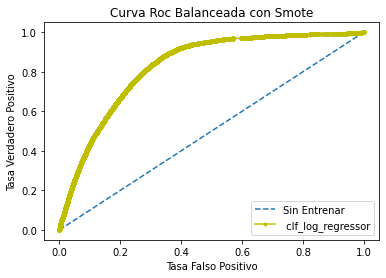

In [110]:
# Pintamos Curva Roc
# Generamos un clasificador sin entrenar que asignada 0 a todo# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clf_log_regressor_smote.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# Claculamos la Curva ROc
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor_smote.predict_proba(X_test)[:, 1])
# Ploteamos
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin Entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Etiquetas
pyplot.title('Curva Roc Balanceada con Smote')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/CLR Model - Roc Cuve Balanced with Smote.png', dpi=75,bbox_inches='tight')
pyplot.show()

In [112]:
print('Resultados 1ª aproximacion: RECALL %f, AUC %f' %(recall_first_aproach, roc_auc_score_first_aproach))
print('Resultados balanceado con Weight Balance: RECALL %f, AUC %f' %(recall_weigth_balance, roc_auc_score_weigth_balance))
print('Resultados balanceado con Smote: RECALL %f, AUC %f' %(recall_smote, roc_auc_score_smote))
print('Resultados balanceado con Nearmiss: RECALL %f, AUC %f' %(recall_nearmiss, roc_auc_score_nearmiss))

Resultados 1ª aproximacion: RECALL 0.022571, AUC 0.488038
Resultados balanceado con Weight Balance: RECALL 0.887383, AUC 0.828233
Resultados balanceado con Smote: RECALL 0.886940, AUC 0.828383
Resultados balanceado con Nearmiss: RECALL 0.682881, AUC 0.718366


# *** Conclusiones

 Las principales métricas elegidas para el modelo de clasificación de regresión logística para decidir si tenemos un buen resultado son la métrica Recall y la curva AUC - Roc. 
 
 Resultados finales:

       - Resultados 1er enfoque: RECALL 0.022571, AUC 0.488038
       - Resultados con Balance de Peso: RECALL 0,887383, AUC 0,828233
       - Resultados con Smote: RECALL 0.886940, AUC 0.828383
       - Resultados con Nearmiss: RECALL 0,682881, AUC 0,718366
- Comenzamos nuestro modelo con una __primera aproximación__ obteniendo resultados __muy mejorables__. Recall 0.02.__ La base de datos utilizada es la original sin ningún tipo de preprocesamiento. 
- Seguimos evolucionando nuestro modelo. No hemos utilizado base de datos con pca porque anteriormente en EDA hemos visto que no era necesario. Utilizamos la base de datos con normalización y codificador de etiquetas. 
- Confirmamos que nuestro conjunto de entrenamiento ha generalizado bien ya que no hay mucha diferencia entre los resultados obtenidos en Test y Train. Podemos descartar el overfitting lo hemos comprobado mediante la Validación Cruzada obteniendo las medias de las diferentes métricas.

- Dado que nuestro __Objetivo está muy desequilibrado__ en un porcentaje del 87% (No) y del 13% (Sí), hemos utilizado _3 formas diferentes de tratamiento del overfitting en la estimación del modelo. El peso de la clase, el Nearmiss y el Smote. Después de entrenar las tres posibilidades, finalmente nos decantamos por Class Weigth.
- Las métricas finales son: Recall 0,887 - Auc 0,835.
- Matriz de confusión__ - En la diagonal de aciertos tenemos 46756 Verdaderos Negativos y 10015 Verdaderos Positivos. En nuestro modelo, la detección de los clientes que sí quieren contratar un seguro es prioritaria.  Necesitamos obtener una buena tasa de verdaderos positivos.  Detectando a aquellos clientes que son susceptibles de tener un seguro de hogar, podemos trabajar de forma más directa. Todo ello con el objetivo de optimizar el tiempo y la eficiencia comercial. El resultado de Recall obtenido es óptimo habiendo obtenido un 88%. La tasa de Auc es del 82%.
- A pesar del resultado, nos faltan, entre otras muchas, variables y datos como los ingresos de los clientes, los hijos, el tipo de trabajo, el salario real en euros obtenido, el lugar de residencia... etc. 
- Seguiremos buscando con otros modelos mejores resultados con las variables disponibles.